<a href="https://colab.research.google.com/github/esferita006/Red-neuronal/blob/main/binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>RED NEURONAL.</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: José Alfredo Cobián Campos.</i></h5>
    <h5 align="center"><i>Ayudante: Jairo Habid Neftali Vera Guerrero.</i></h5>
  <h5 align="center"><i>Materia: Bases de Datos.</i></h5>
  <h5 align="center"><i>integrantes:</i><h5 align="center"><i> -Robles Salazar Diego</i><h5 align="center"><i> -David José de Jesús Carrillo Bárcenas </font><h5 align="center"><i>-Erika Giebele Martinez Mares</font><h5

In [ ]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 38.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [ ]:
import pandas as pd
import mysql.connector

# Conectaremos con la base de datos que encontramos
mydb = mysql.connector.connect(
  host="hpc-matematicas-z.fciencias.unam.mx",
  user="JimmyNeutron",
  password="CarlSheen",
  database="LIMONADA"
)

# Definimos la consulta de SQL
query = "SELECT * FROM VENTAS"

# vamos a leer los datos de la base de datos y crearemos un DataFrame para poder interactuar con la informacion
df = pd.read_sql(query, mydb)

# Ahora podemoss trabajar con los datos del DataFrame de la base
# por ejemplo, mostrar las primeras filas(pueden poner algun numero en el centro de los parentesis y seran las filas que saldran como dato curioso)
print(df.head(20))



    id_venta  fin_semana  soleado  caluroso  quincena  precio  vendidos
0          1           1        0         0         1     9.0      71.0
1          2           1        1         1         0    10.0     137.0
2          3           0        1         0         0    10.0       0.0
3          4           1        0         0         1     6.0     107.0
4          5           1        0         0         1     8.0      80.0
5          6           1        1         0         0     6.0     110.0
6          7           1        1         1         0     8.0     167.0
7          8           0        0         1         1     8.0       0.0
8          9           1        0         1         0     8.0     124.0
9         10           1        1         0         0     7.0      95.0
10        11           0        0         1         1     9.0       0.0
11        12           0        0         1         0     8.0       0.0
12        13           0        0         1         1     9.0   

<ipython-input-3-bb15e1ab6625>:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


##PASAMOS A ESTANDARIZAR

In [ ]:
# Calculamos la media y la desviación estándar de la columna de precios, luego estandarisaremos las columnas de precios

precioMean = df['precio'].mean()
precioStd = df['precio'].std()
df['precio'] = (df ['precio']-precioMean)/precioStd

#print("la media es:",precioMean ,"de precio")
#print("la varianza es:",precioStd ,"de precio")

# Calcula la media y la desviación estándar de la columna numSold, luego estandariza numSold
vendidosMean = df['vendidos'].mean()
vendidosStd = df['vendidos'].std()
df ['vendidos'] = (df['vendidos']-vendidosMean)/vendidosStd

#print("la media es:",vendidosMean,"de vendidos")
#print("la varianza es:",vendidosStd,"de vendidos")

In [ ]:
df.head()

,id_venta,fin_semana,soleado,caluroso,quincena,precio,vendidos
0,1,1,0,0,1,0.846650,-0.023669
1,2,1,1,1,0,1.452587,0.743734
2,3,0,1,0,0,1.452587,-0.849208
3,4,1,0,0,1,-0.971158,0.394915
4,5,1,0,0,1,0.240714,0.080977


In [ ]:
# Creamos los tensores PyTorch y pasamos a CPU o GPU depende de la eficiencia y capacidad de cada uno
import torch

# Configuraramos nuestro el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Cree nuestros tensores PyTorch y pase a CPU o GPU si está disponible esto para que sea mas eficiente
# Extraemos las entradas y creamos un tensor PyTorch x (entradas)
inputs = ['fin_semana', 'soleado', 'caluroso', 'quincena', 'precio']
x = torch.tensor(df[inputs].values,dtype=torch.float, device=device)

# Extraemos las salidas y creamos un tensor PyTorch y (outputs)
outputs = ['vendidos']
y = torch.tensor(df[ outputs].values,dtype=torch.float, device=device)
#para que entiendaan esto es por cada entrada debe de habaer una salida

In [ ]:
# imprimimos las primeras 5 entradas (seran como matrices qeu vemos en lineal y asi)
x[0:5]

tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 1.0000,  1.0000,  1.0000,  0.0000,  1.4526],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.4526],
        [ 1.0000,  0.0000,  0.0000,  1.0000, -0.9712],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.2407]])

In [ ]:
# imprimimos las primeras 5 salidas solo para ver como se ven
y[0:5]

tensor([[-0.0237],
        [ 0.7437],
        [-0.8492],
        [ 0.3949],
        [ 0.0810],
        [ 0.4298],
        [ 1.0926],
        [-0.8492],
        [ 0.5926],
        [ 0.2554]])

##ELABORACION DE RED NEURONAL


<!DOCTYPE html>
<html>
<head>
    <title></title>
</head>
<body>
    <h1></h1>
    <img src="https://media.tenor.com/5n8N-x-hZl0AAAAC/ahora-si.gif" alt="Descripción de la imagen">
</body>
</html>


In [ ]:
import torch
import torch.nn as nn

# Definimos la red neuronal PyTorch
# Número de entradas: 5
# Número de unidades ocultas: 100
# Número de capas ocultas: 1
# Función de activación: Relu
# Número de salidas: 1

model = nn.Sequential(
            nn.Linear(5,100),
            nn.ReLU(),
            nn.Linear(100,1)
        )

# lo movemos a la CPU o GPU dependiendo de lo que tengamos disponible o sea mejor
model.to(device)

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

##ENTRENAMIENTO

In [ ]:
import torch.optim as optim

# Medimos nuestra red neuronal según el
criterio=torch.nn.MSELoss()

# Entrenamos nuestra red con un optimizador SGD simple Optimizer
optimizar = optim.SGD(model.parameters(), lr=0.01, momentum =0.9)

# Entrenamos nuestra red usando el conjunto de datos completos 5 veces
for epoch in range(5):
    totalLoss = 0
    for i in range(len(x)):
       # Single Forward Pass
        ypred = model(x[i])
        # Medimos qué tan bien esta prediciendo el modelo frente al valor real
        loss = criterio(ypred, y[i])

        # Realizamos un seguimiento de qué tan bien predijo el modelo (llamado pérdida)
        totalLoss+=loss.item()

        # Actualizar la red neuronal
        optimizar.zero_grad()
        loss.backward()
        optimizar.step()

    # Imprime nuestra pérdida después de cada iteración de entrenamiento
    print ("Pérdida total: ",totalLoss )

    #cada vez que corramos esta celda la perdida total debera de disminuir pues la red va aprendiendo y acercandoce al valor real

Pérdida total:  0.31724520495637787
Pérdida total:  0.29293223208272323
Pérdida total:  0.25274823654019585
Pérdida total:  0.25272371065891
Pérdida total:  0.23350493751543944


##MEDICION DE RENDIMIENTO

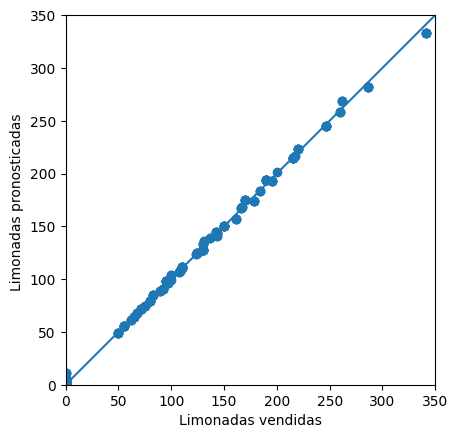

In [ ]:
import matplotlib.pyplot as plt
# Graficamos nuestras predicciones vs. valores verdaderos
@torch.no_grad()
def prediccion_grafica(model, x, y , minValue, maxValue):
    model.eval()
    # Establecer el modelo en modo de inferencia

    predicciones=[]
    # Seguir predicciones
    actual=[]
    # Rastreamos las etiquetas reales

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):
        # Paso único hacia adelante
        pred = model(x[i])

        # Des- normalizar nuestra predicción
        pred = pred*vendidosStd+vendidosMean
        act = y[i]*vendidosStd+vendidosMean

        # Guardar predicción y etiqueta real
        predicciones.append(pred.tolist())
        actual.append(act.item())

    # Trazar datos reales vs predicciones
    plt.scatter(actual, predicciones)
    plt.xlabel('Limonadas vendidas')
    plt.ylabel('Limonadas pronosticadas ')
    plt.plot([minValue,maxValue], [minValue,maxValue])
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)

    # Hacer que la visualización sea igual en ambas dimensiones
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

prediccion_grafica(model, x, y, 0, 350)

##PREDICCIONES PROPIAS


In [ ]:
# A continuación, usamos la fórmula del generador de datos sintéticos para
# determinar cuál debería haber sido el resultado real.
def datasetGenerator(fin_semana, soleado, calido, quincena, precio):
    num_limonadasV = 0
    if fin_semana:
        num_limonadasV = (soleado * 5 + int(500 / precio))
        if quincena:
            num_limonadasV = 1.3 * num_limonadasV
        if calido:
            num_limonadasV = 2 * num_limonadasV
        if soleado:
            num_limonadasV = 1.25 * num_limonadasV
    num_limonadasV = int(num_limonadasV)

    return num_limonadasV


# Datos que afectan la cantidad de limones vendidos en un día
fin_semana = 1
soleado = 0
calido = 0
quincena = 1
precio = 5

# Calcule cuál hubiera sido el resultado real usando
# el algoritmo del conjunto de datos sintético
actual = datasetGenerator(fin_semana, soleado, calido, quincena, precio)

# Use la CPU ya que solo necesitamos hacer un cálculo único
model.to('cpu')

# Normalizar nuestras entradas usando los mismos valores para nuestro entrenamiento
precio = (precio - precioMean) / precioStd

# Crear nuestro tensor de entrada
x1 = torch.tensor([fin_semana, soleado, calido, quincena, precio], dtype=torch.float)

# Pasar la entrada a la red neuronal
y1 = model(x1)

# Desnormalizar nuestra salida y1
y1 = y1 * vendidosStd + vendidosMean

# Comparar lo que su red predijo con el resultado real
print("Neural Network Predicts:", y1.item())
print("Resultado real:", actual)


Neural Network Predicts: 133.59713745117188
Resultado real: 130


<!DOCTYPE html>
<html>
<head>
    <title></title>
</head>
<body>
    <h1></h1>
    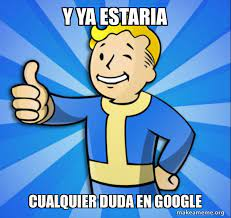
</body>
</html>
